In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import matplotlib.pyplot as plt


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

In [ ]:
df = pd.read_csv('/content/set3.csv')

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M', errors='coerce', dayfirst=True)
category = ['Apparel','Beauty','Education','Food','Gift','Household','Other','Self-development','Social Life','Transportation']

df.sort_values('date', inplace=True)
df.head()

In [ ]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek



df.head()


In [ ]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['description'] = df['description'].fillna('').apply(preprocess_text)
# print(df.head())

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
# print(df.head())

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(df['description'])
y = df['category_encoded']
print(X,y)

  (0, 85)	1.0
  (1, 116)	1.0
  (2, 46)	1.0
  (3, 85)	0.5058301148310604
  (3, 38)	0.5990017714465321
  (3, 88)	0.6207517802905705
  (4, 116)	1.0
  (5, 46)	1.0
  (6, 101)	1.0
  (7, 116)	1.0
  (8, 46)	1.0
  (9, 137)	1.0
  (10, 116)	1.0
  (11, 46)	1.0
  (12, 85)	0.5058301148310604
  (12, 38)	0.5990017714465321
  (12, 88)	0.6207517802905705
  (13, 21)	1.0
  (14, 85)	0.5058301148310604
  (14, 38)	0.5990017714465321
  (14, 88)	0.6207517802905705
  (15, 101)	1.0
  (16, 137)	1.0
  (17, 10)	1.0
  (18, 21)	1.0
  :	:
  (1220, 46)	0.37671485485275075
  (1220, 127)	0.6550137090677075
  (1220, 50)	0.6550137090677075
  (1221, 133)	1.0
  (1222, 137)	1.0
  (1223, 85)	1.0
  (1224, 154)	0.5773502691896257
  (1224, 128)	0.5773502691896257
  (1224, 155)	0.5773502691896257
  (1225, 102)	1.0
  (1226, 137)	0.2302545715075897
  (1226, 108)	0.3221901463280138
  (1226, 56)	0.4194339533295203
  (1226, 58)	0.4194339533295203
  (1226, 57)	0.4194339533295203
  (1226, 138)	0.3734661659193083
  (1226, 109)	0.419433953

# **Using Multinomial Naive Bayes**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
nb_model = grid_search.best_estimator_

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
print("Categorization Model Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         1
           3       0.96      1.00      0.98       238
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      0.95      0.98        42
           8       1.00      0.38      0.55         8
           9       1.00      0.97      0.98        62

    accuracy                           0.97       370
   macro avg       0.87      0.78      0.80       370
weighted avg       0.97      0.97      0.97       370

Categorization Model Accuracy: 0.9702702702702702


# **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
rf_model = grid_search.best_estimator_

y_pred = rf_model.predict(X_test)
print("Random Forest Model")
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
print("Categorization Model Accuracy:", accuracy)


Random Forest Model
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         1
           3       0.95      1.00      0.97       238
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       0.97      0.93      0.95        42
           8       1.00      0.38      0.55         8
           9       1.00      0.97      0.98        62

    accuracy                           0.96       370
   macro avg       0.87      0.77      0.80       370
weighted avg       0.96      0.96      0.96       370

Categorization Model Accuracy: 0.9648648648648649


# **Using ComplementNB**

In [ ]:
from sklearn.naive_bayes import ComplementNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0]}
grid_search = GridSearchCV(ComplementNB(), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
cnb_model = grid_search.best_estimator_

y_pred = cnb_model.predict(X_test)
print("Complement Naive Bayes Model")
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
print("Categorization Model Accuracy:", accuracy)


Complement Naive Bayes Model
              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00         1
           3       1.00      0.93      0.96       238
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       0.93      0.95      0.94        42
           8       0.50      0.50      0.50         8
           9       1.00      0.97      0.98        62

    accuracy                           0.93       370
   macro avg       0.72      0.79      0.74       370
weighted avg       0.96      0.93      0.94       370

Categorization Model Accuracy: 0.9297297297297298


# Using Support Vector Machine

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
svm_model = grid_search.best_estimator_

y_pred = svm_model.predict(X_test)
print("Support Vector Machine Model")
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
print("Categorization Model Accuracy:", accuracy)


Support Vector Machine Model
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         1
           3       0.95      1.00      0.97       238
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       0.97      0.93      0.95        42
           8       1.00      0.38      0.55         8
           9       1.00      0.97      0.98        62

    accuracy                           0.96       370
   macro avg       0.87      0.77      0.80       370
weighted avg       0.96      0.96      0.96       370

Categorization Model Accuracy: 0.9648648648648649


# **Additional Features**

In [ ]:
# budget per category
budgets = {
    'Apparel': 300,
    'Beauty': 100,
    'Education': 500,
    'Food': 3000,
    'Gift': 300,
    'Household': 700,
    'Other': 1000,
    'Self-development': 1500,
    'Social Life': 2000,
    'Transportation': 5000
}

# Calculate monthly expenses by category
df['month_year'] = df['date'].dt.to_period('M')
monthly_expense = df.groupby(['month_year', 'category']).amount.sum().unstack().fillna(0)



# # Display monthly expenses with budgets
# monthly_expense

budget_df = pd.DataFrame({month: budgets for month in monthly_expense.index}).T

# Calculate the difference between actual expenses and budget
difference_df = monthly_expense - budget_df

# Display any months/categories where spending exceeded the budget
overspending = difference_df[difference_df > 0].fillna(0)
print("Overspending by Category and Month:")
print(overspending)


Overspending by Category and Month:
category    Apparel  Beauty  Education      Food  Gift  Household    Other  \
month_year                                                                   
2021-11        0.00    0.00       0.00    174.40   0.0       0.00     0.00   
2021-12     2290.00   96.00       0.00   2335.00   0.0    4100.00     0.00   
2022-01      247.28    0.00     900.00  10622.15   0.0    3880.00  2053.75   
2022-02      498.00    0.00       0.00   5451.35   0.0    2108.00  1281.59   
2022-03        0.00   73.47       0.00   1015.49   0.0    4337.03     0.00   
2022-04     1856.96    0.00       0.00      0.00   0.0       0.00  1054.17   
2022-05      209.55   90.05       0.00   1359.53   0.0       0.00   259.24   
2022-06      497.69  127.95       0.00   1791.21   0.0    4078.65  1679.42   
2022-07       95.98    0.00       0.00   2076.11   0.0    1305.71   124.85   
2022-08        0.00    0.00    1023.35      0.00   0.0       0.00     0.00   
2022-09        0.00    0.00 

# **Budget Chart**

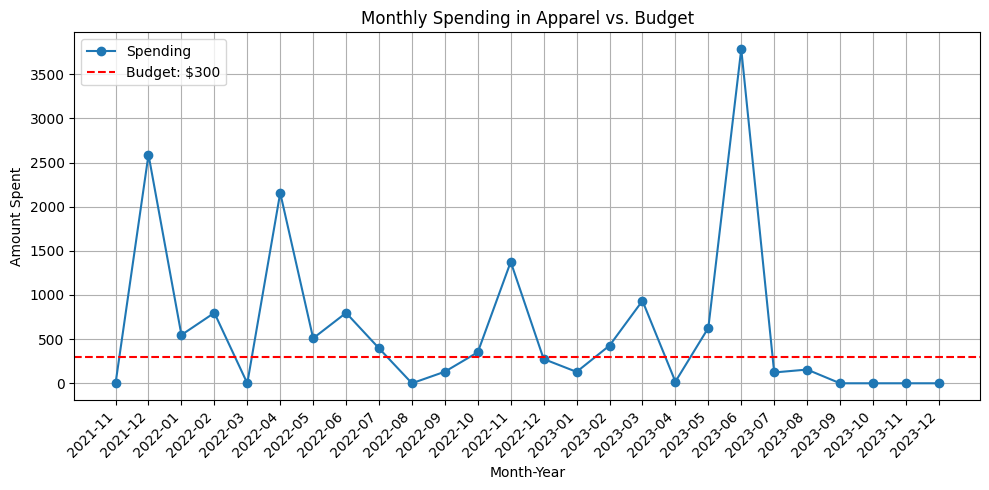

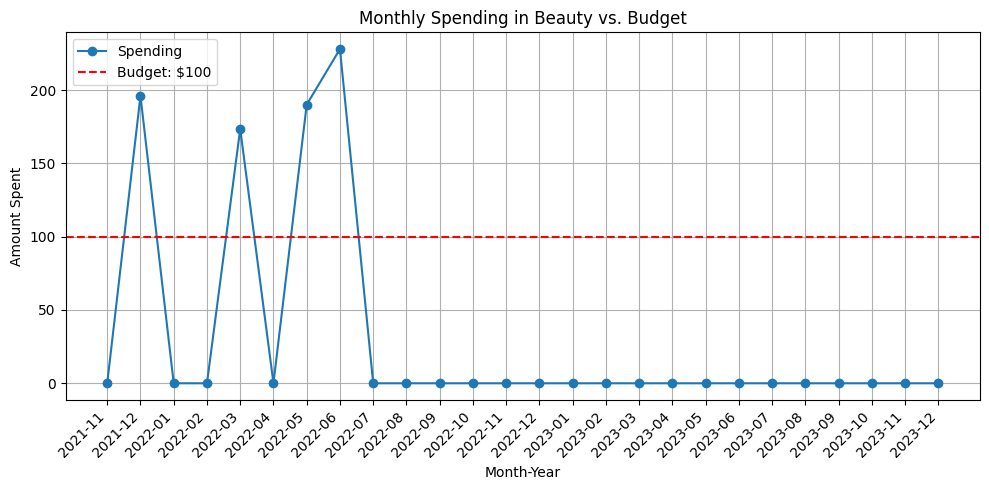

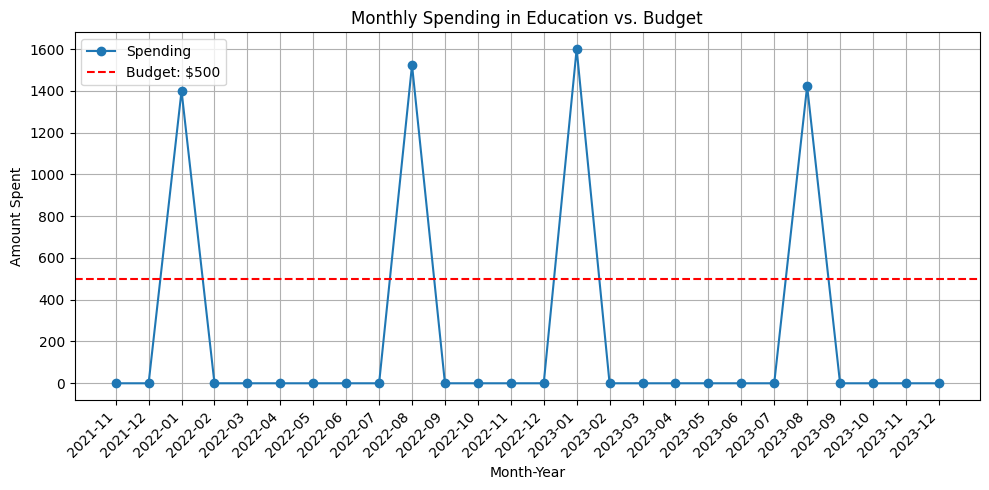

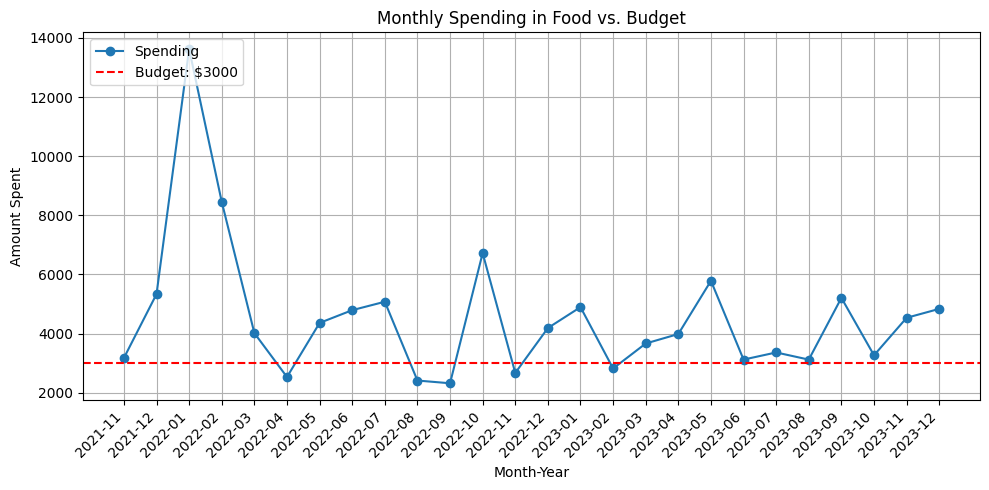

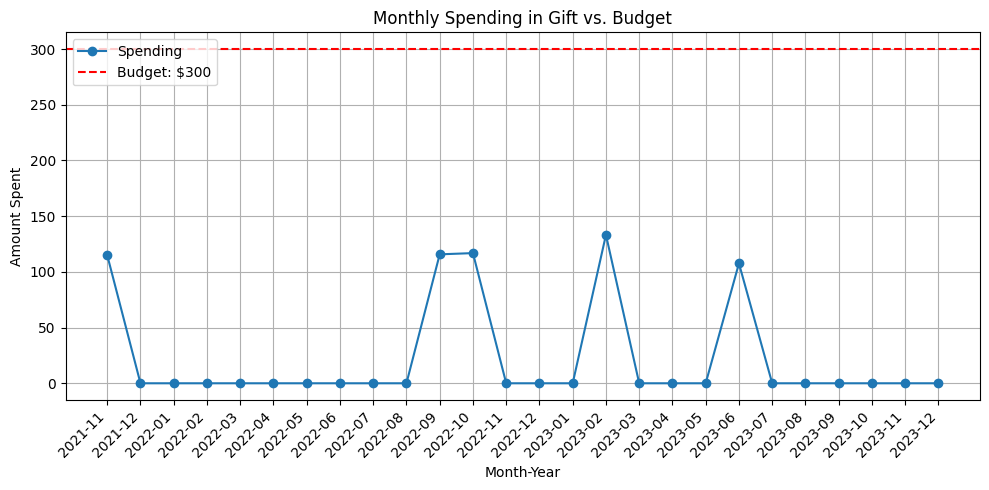

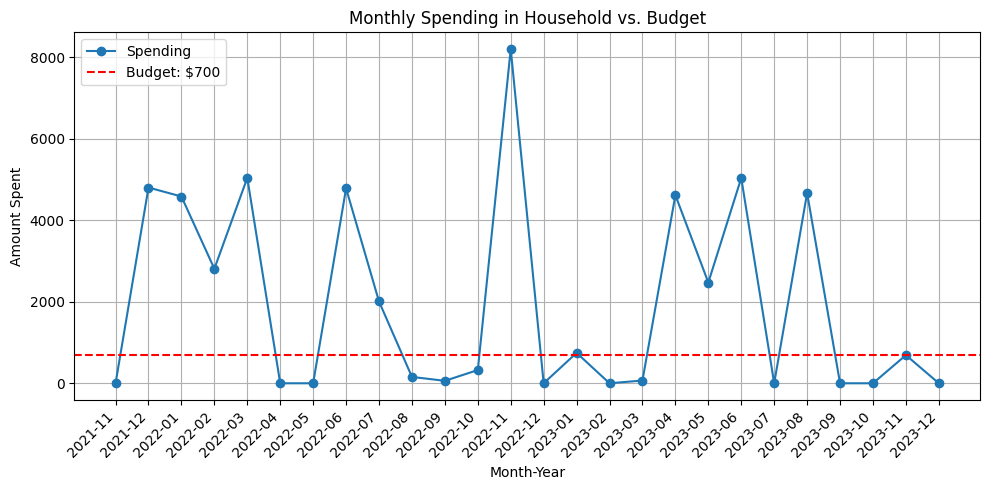

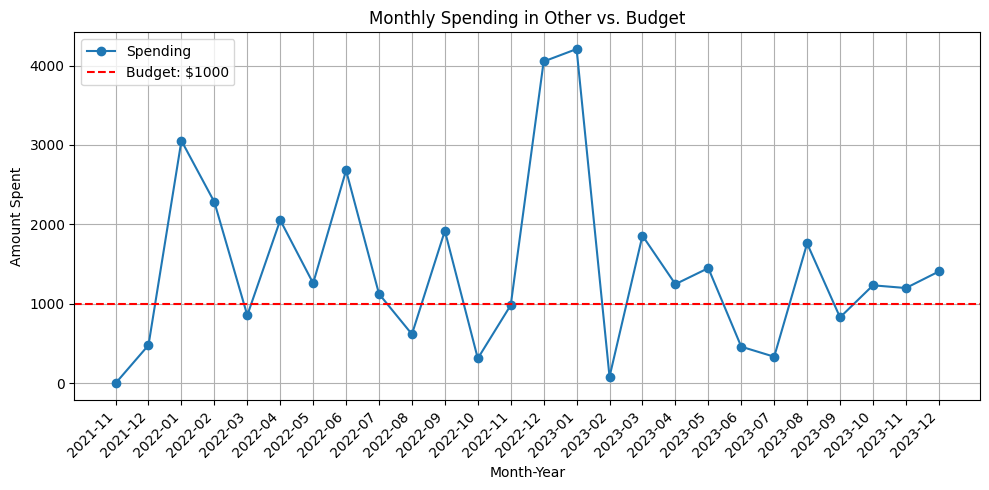

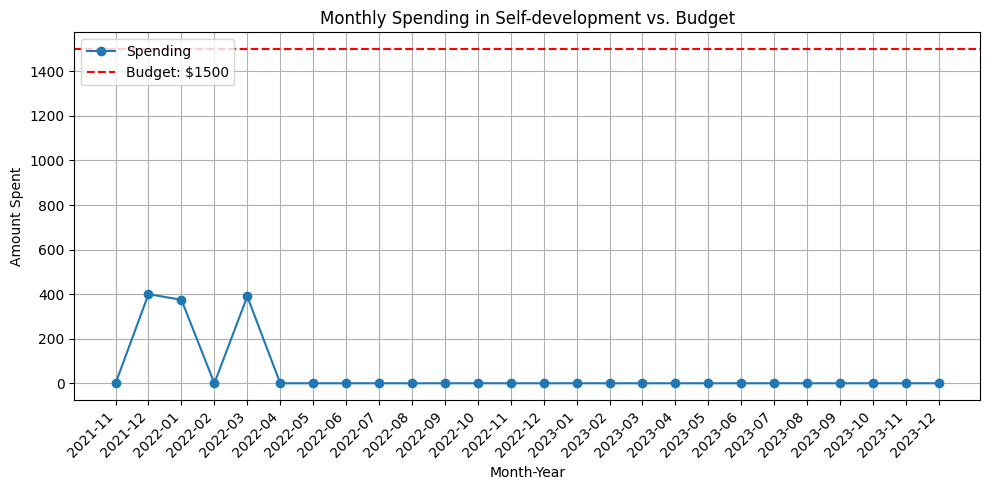

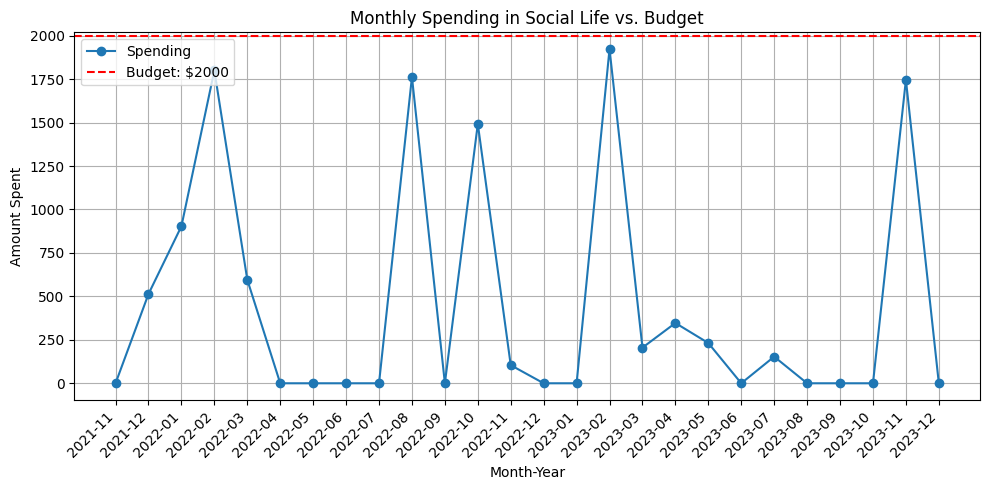

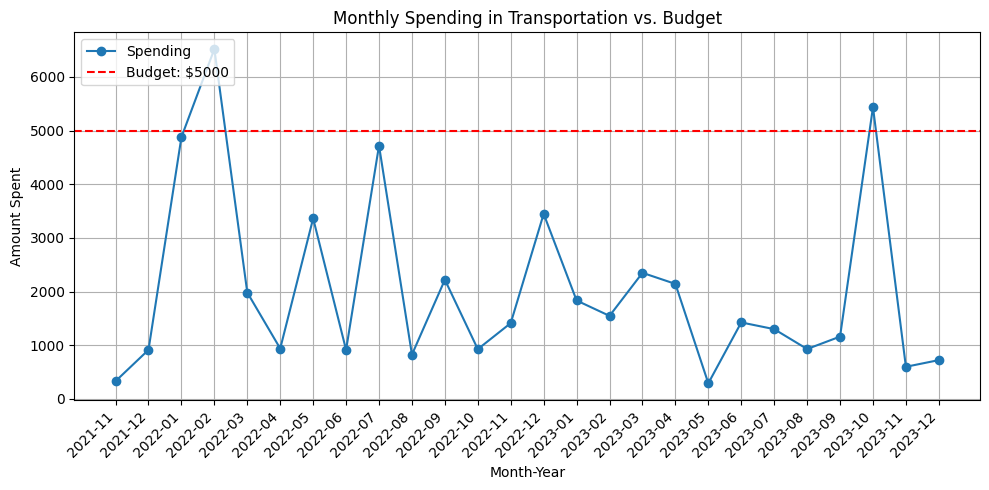

In [ ]:
for category in budgets.keys():
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_expense.index.astype(str), monthly_expense[category], marker='o', label='Spending')
    plt.axhline(y=budgets[category], color='r', linestyle="--", label=f"Budget: ${budgets[category]}")
    plt.title(f"Monthly Spending in {category} vs. Budget")
    plt.xlabel("Month-Year")
    plt.ylabel("Amount Spent")
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **Future Prediction**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'date' is in datetime format and calculate monthly expenses by category
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')
monthly_expense = df.groupby(['month_year', 'category']).amount.sum().unstack().fillna(0)

# Example: Time series prediction for 'Food' expenses
food_expense = monthly_expense['Food'].fillna(0)

# Train-test split (90% train, 10% test)
train_size = int(len(food_expense) * 0.9)
train, test = food_expense[:train_size], food_expense[train_size:]

# ARIMA model training
model = ARIMA(train, order=(1, 1, 1))
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test))
print("Predicted Expenses:", forecast)
forecast_length = len(test)
print("Number of future months predicted:", forecast_length)


Predicted Expenses: 2023-10    4668.114809
2023-11    4469.068882
2023-12    4395.575339
Freq: M, Name: predicted_mean, dtype: float64
Number of future months predicted: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# **Recommendation / Suggestion**

In [ ]:
def generate_recommendation(row):
    if row['category'] == 'Food' and row['amount'] > 300:
        return "Consider cooking at home more often to save money on food."
    elif row['category'] == 'Apparel' and row['amount'] > 150:
        return "Try limiting clothing purchases to reduce spending on apparel."
    elif row['category'] == 'Transportation' and row['amount'] > 100:
        return "Consider using public transport or carpooling to save on transportation costs."
    elif row['category'] == 'Beauty' and row['amount'] > 100:
        return "Consider reducing beauty expenses to stay within budget."
    elif row['category'] == 'Education' and row['amount'] > 200:
        return "Review educational expenses to ensure they're necessary and within budget."
    elif row['category'] == 'Gift' and row['amount'] > 50:
        return "Consider setting a gift budget to manage expenses better."
    elif row['category'] == 'Household' and row['amount'] > 250:
        return "Try tracking household expenses closely to avoid overspending."
    elif row['category'] == 'Self-development' and row['amount'] > 150:
        return "Consider prioritizing self-development expenses to stay on track with your budget."
    elif row['category'] == 'Social Life' and row['amount'] > 200:
        return "Plan social outings within a budget to keep expenses manageable."
    else:
        return "Good job staying within your budget!"

# Apply recommendations
df['recommendation'] = df.apply(generate_recommendation, axis=1)
df[['date', 'category', 'amount', 'recommendation']].head()


,date,category,amount,recommendation
230,2021-11-21 15:50:00,Food,875.0,Consider cooking at home more often to save mo...
229,2021-11-21 17:07:00,Transportation,130.0,Consider using public transport or carpooling ...
227,2021-11-22 14:16:00,Food,90.0,Good job staying within your budget!
228,2021-11-22 14:16:00,Food,97.0,Good job staying within your budget!
225,2021-11-23 22:53:00,Transportation,50.0,Good job staying within your budget!


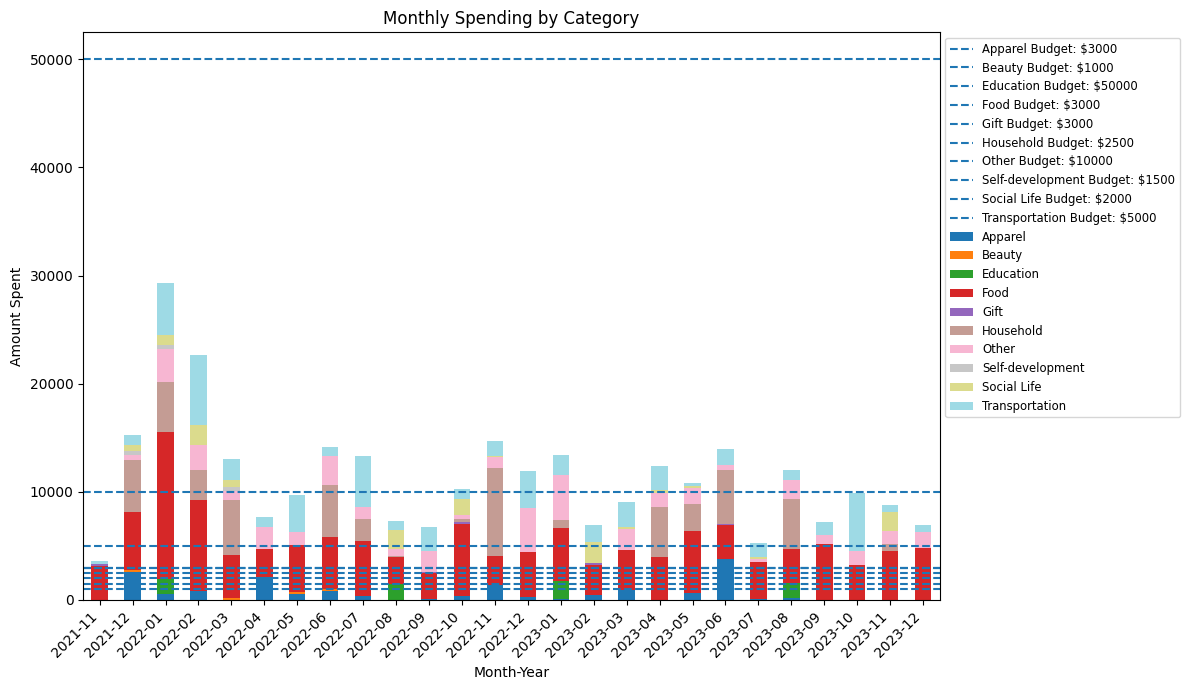

In [ ]:
import matplotlib.pyplot as plt

# Monthly spending by category (stacked bar chart)
monthly_expense.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")

# Format the x-axis with rotated labels for readability
plt.xticks(rotation=45, ha='right')
plt.title("Monthly Spending by Category")
plt.xlabel("Month-Year")
plt.ylabel("Amount Spent")

# Add budget lines for each category
budgets = {
    'Apparel': 3000,
    'Beauty': 1000,
    'Education': 50000,
    'Food': 3000,
    'Gift': 3000,
    'Household': 2500,
    'Other': 10000,
    'Self-development': 1500,
    'Social Life': 2000,
    'Transportation': 5000
}


# Draw budget lines across the plot
for category, budget in budgets.items():
    plt.axhline(y=budget, linestyle="--", label=f"{category} Budget: ${budget}")

# Add a legend to identify budgets and categories
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small")

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:

# Assume monthly_expense is a DataFrame with monthly spending data for each category
# and budgets is a dictionary of budget values for each category

# Plot each category separately with its budget line
for category in budgets.keys():
    plt.figure(figsize=(10, 5))
    plt.plot(monthly_expense.index.astype(str), monthly_expense[category], marker='o', label='Spending')
    plt.axhline(y=budgets[category], color='r', linestyle="--", label=f"Budget: ${budgets[category]}")
    plt.title(f"Monthly Spending in {category}")
    plt.xlabel("Month-Year")
    plt.ylabel("Amount Spent")
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for readability
    plt.show()  # Display each plot separately


In [ ]:
from sklearn.ensemble import IsolationForest

# Prepare data for anomaly detection
df['amount_scaled'] = (df['amount'] - df['amount'].mean()) / df['amount'].std()
anomaly_features = df[['amount_scaled', 'day', 'month', 'day_of_week']]

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
df['anomaly'] = isolation_forest.fit_predict(anomaly_features)
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# View detected anomalies
anomalies = df[df['anomaly'] == 'Anomaly']
anomalies.head()
